In [24]:
import os
from tbp.monty.frameworks.utils.logging_utils import load_stats

import matplotlib.pyplot as plt
from tbp.monty.frameworks.utils.plot_utils import plot_graph
import numpy as np
from scipy.spatial.transform import Rotation as R

In [86]:
pretrain_path = os.path.expanduser("./mnist/log/")
pretrained_dict = pretrain_path + "mnist_training/pretrained/"

log_path = os.path.expanduser("./mnist/log/")
exp_name = "mnist_inference"
exp_path = log_path + exp_name

train_stats, eval_stats, detailed_stats, lm_models = load_stats(exp_path,
                                                                load_train=False, # doesn't load train csv
                                                                load_eval=False, # loads eval_stats.csv
                                                                load_detailed=False, # doesn't load .json
                                                                load_models=True, # loads .pt models
                                                                pretrained_dict=pretrained_dict,
                                                               )

...loading LM models...


In [92]:
lm_models['1']['LM_0'].keys()

dict_keys(['0_0', '1_1', '2_2', '3_3', '4_4', '5_5', '6_6', '7_7', '8_8', '9_9'])

In [95]:
object0 = lm_models['0']['LM_0']['8_8']['patch']
# object1 = lm_models['0']['LM_0']['new_object1']['patch']


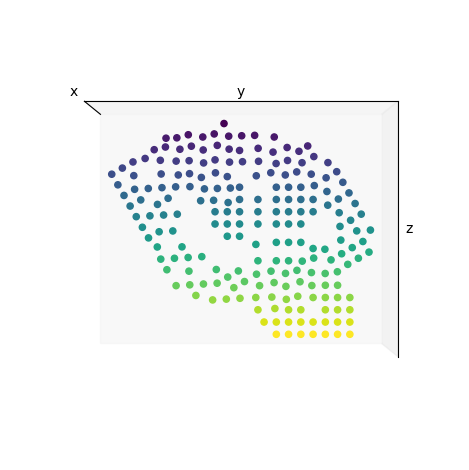

In [96]:
plot_graph(object0, rotation=180)
plt.show()

In [38]:
object0

Model for new_object0:
   Contains 81 points in graph.
   Feature grid shape: torch.Size([50, 50, 50, 22])
   Stored features and their indexes:
           pose_vectors - 0:9,
           pose_fully_defined - 9:10,
           on_object - 10:11,
           pose_vectors_flat - 11:17,
           rgba - 17:20,
           principal_curvatures_log - 20:22,

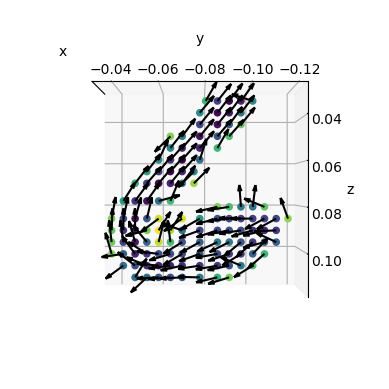

In [83]:
locs = np.array(object1.pos)
dirs = object1.x[:, 6:9]
colors = object1.x[:, 20]
plt.figure()
ax = plt.subplot(1,1,1,projection='3d')
ax.scatter(locs[:,1], -locs[:,0], locs[:,2], c=colors)
ax.quiver(locs[:, 1], -locs[:, 0], locs[:, 2], dirs[:, 1], -dirs[:, 0], dirs[:, 2], length=0.01, normalize=True, color='black')
ax.set_aspect('equal')
ax.view_init(elev=180, azim=180)
ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


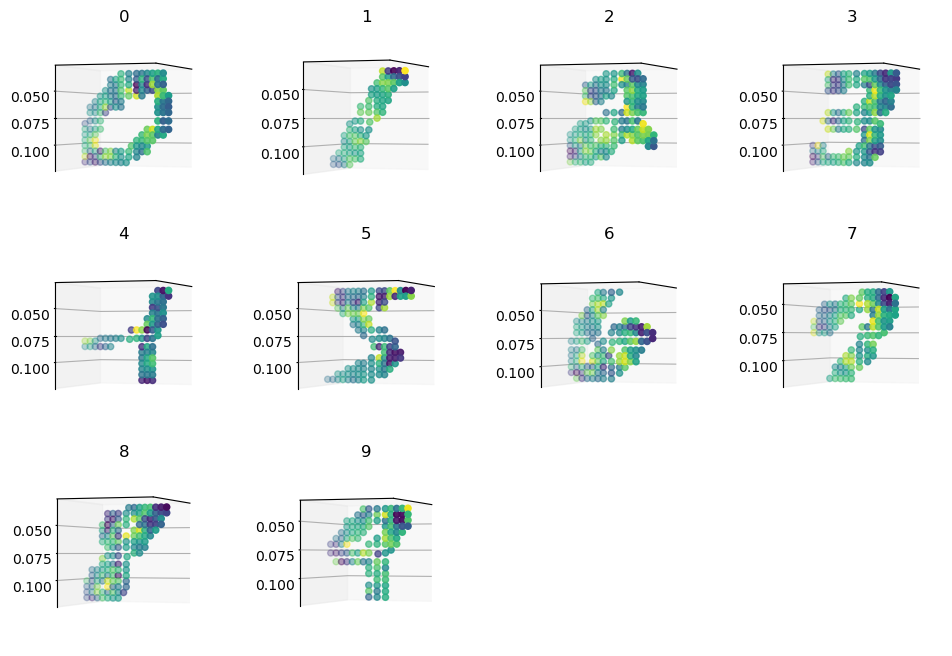

In [84]:
pretrained_models = lm_models['pretrained'][0]
plt.figure(figsize=(12,8))
i = 0
for label, model in pretrained_models.items():
    locs = model['patch'].pos
    colors = model['patch'].x[:, 21]
    ax = plt.subplot(3,4,i+1,projection='3d')
    ax.scatter(locs[:,1], -locs[:,0], locs[:,2], c=colors)
    ax.set_aspect('equal')
    ax.view_init(elev=180, azim=160)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label.split('_')[0])
    i += 1
plt.show()


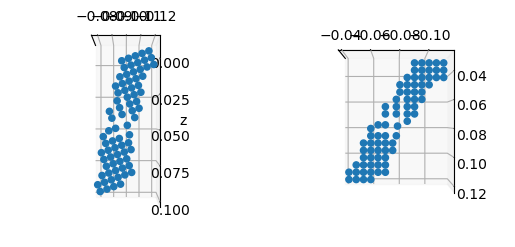

In [85]:
locs = np.array(pretrained_models['1_1']['patch'].pos)
rotation = R.from_euler('xyz', [0,20,0], degrees=True)
rotated_locs = rotation.apply(locs)
plt.figure()
ax = plt.subplot(1,2,1,projection='3d')
ax.scatter(rotated_locs[:,1], -rotated_locs[:,0], rotated_locs[:,2])
ax.set_aspect('equal')
ax.view_init(elev=180, azim=180)
ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.scatter(locs[:,1], -locs[:,0], locs[:,2])
ax2.set_aspect('equal')
ax2.view_init(elev=180, azim=180)
ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_zticks([])
plt.show()